***Antonio Soares Couto Neto***

**Exercícios de Séries Temporais**

In [ ]:
#Importar bibliotecas necessárias

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


Dataset do INMET - A base de dados contempla os dados climáticos diários dos anos de 1993 a 2015 da estação meteorológica 83586, localizada na cidade de Sete Lagoas - MG - [Download](https://github.com/PatriciaLucas/Evapotranspiracao/blob/master/variaveis_setelagoas.csv)

In [ ]:
df = pd.read_csv('variaveis_setelagoas.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    8400 non-null   object 
 1   Tmax    8400 non-null   float64
 2   Tmin    8400 non-null   float64
 3   I       8400 non-null   float64
 4   Tmean   8400 non-null   float64
 5   UR      8400 non-null   float64
 6   V       8400 non-null   float64
 7   J       8400 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 525.1+ KB


Utilizar a Data e o valor Tmax (Temperatura Máxima)

In [ ]:
# Converter a coluna 'Data' para o tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

# Manter apenas as colunas 'Data' e 'Tmax'
df_time_series = df[['Data', 'Tmax']]

# Definir 'Data' como o índice
df_time_series.set_index('Data', inplace=True)

# Resultado
print(df_time_series.head())

            Tmax
Data            
1993-01-01  31.3
1993-01-02  33.8
1993-01-03  32.1
1993-01-04  28.9
1993-01-05  27.7


In [ ]:
df_time_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8400 entries, 1993-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tmax    8400 non-null   float64
dtypes: float64(1)
memory usage: 131.2 KB


**Exercício 1 - Treinamento do Modelo**

•	Utilize a biblioteca Prophet para treinar um modelo que seja capaz de prever a temperatura máxima nos próximos 365 dias (um ano) deverá usar: {'Data': 'ds', 'Tmax': 'y'}.


Preparar os Dados (variáveis renomeadas)

In [ ]:
df = df.reset_index().rename(columns={'Data': 'ds', 'Tmax': 'y'})
df.head()

,index,ds,y,Tmin,I,Tmean,UR,V,J
0,0,1993-01-01,31.3,15.4,11.3,22.86,64.75,0.740445,1
1,1,1993-01-02,33.8,16.1,11.2,23.80,64.50,0.500000,2
2,2,1993-01-03,32.1,17.0,9.5,23.92,67.50,1.119698,3
3,3,1993-01-04,28.9,18.8,6.4,23.38,73.75,0.830743,4
4,4,1993-01-05,27.7,18.6,2.5,21.82,83.25,0.559849,5


Modelo Prophet

In [ ]:
# Inicializar o modelo
model = Prophet()

# Ajustar o modelo
model.fit(df)

# Criar um DataFrame para datas futuras
future = model.make_future_dataframe(periods=12, freq='M')

# Fazer previsões
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7e3_2bm_/amgfu58w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7e3_2bm_/ji2bq_9w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94598', 'data', 'file=/tmp/tmp7e3_2bm_/amgfu58w.json', 'init=/tmp/tmp7e3_2bm_/ji2bq_9w.json', 'output', 'file=/tmp/tmp7e3_2bm_/prophet_modeltlp1bsg4/prophet_model-20240711110023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:00:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:00:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Exercício 2 – Gráfico da Previsão**

•	Plotar o gráfico com a previsão.


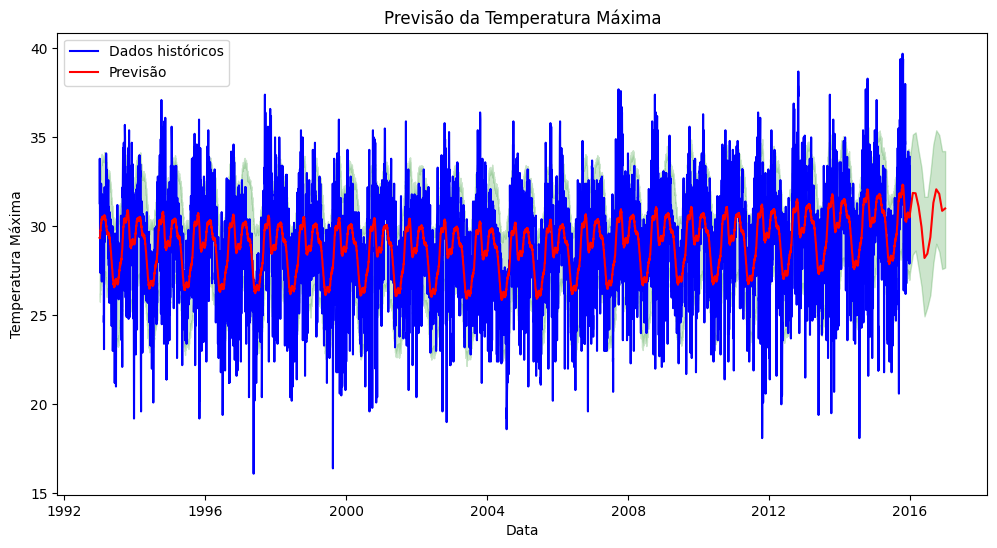

In [ ]:
# Plotar o gráfico com a previsão

# Plotar a série original
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Dados históricos', color='blue')

# Plotar a previsão
plt.plot(forecast['ds'], forecast['yhat'], label='Previsão', color='red')

# Adicionar intervalos de incerteza
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2)

# Configurar o gráfico
plt.title("Previsão da Temperatura Máxima")
plt.xlabel("Data")
plt.ylabel("Temperatura Máxima")
plt.legend()
plt.show()